#Analysing data from rain gauges in the city of Sao Paulo, since the year 2000, using Pandas and Vowpal Wabbit.

Giovanni B M Schiffini
July 2021

Data retrieved from https://www.snirh.gov.br/hidroweb/apresentacao using this GitHub project: https://github.com/duartejr/pyHidroWeb .

**Pandas** and **Vowpal Wabbit** integration learned from: https://github.com/VowpalWabbit/vowpal_wabbit/blob/master/python/examples/DFtoVW_tutorial.ipynb

Vowpal Wabbit is an open source library to handle reinforcement learning and fast supervised learning. Its main use so far has been on text analysis applications.
However, this library is also a good tool to work with numerical values. 
In this notebook we will create a combined CSV from the rain gauges in Sao Paulo - Brazil, mine the important data, convert it to Vowpal Wabbit input and try to predict rain in a fast and simple way.

# Imports and dataframe construction

In [ ]:
#import libraries
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
#specify directory
#os.chdir('')

#import csv files
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

#combine all csv files in the list
#combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
#creating dataframe from combined csv with 78 rain gauges from Sao Paulo city
df = pd.read_csv('')

# Dataset analysis

In [ ]:
df

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade
0,lat,-23.407,-23.4500,-23.4600,-23.4167,-23.4000,-23.4667,-23.502480,-23.522,-23.5167,-23.531015,-23.5167,-23.5667,-23.5833,-23.6333,-23.650398,-23.6500,-23.96,-23.55,-23.5333,-23.45,-23.5667,-23.502480,-23.650398,-23.6667,-23.6000,-23.5000,-23.7667,-23.8667,-23.6167,-23.5261,-23.4833,-23.6333,-23.9333,-23.5500,-23.7833,-23.6000,-23.8833,-23.5333,-23.5833,-23.5667,-23.6,-23.5500,-23.5167,-23.5333,-23.5833,-23.51,-23.85,-23.7500,-23.69,-23.7333,-23.7333,-23.9333,-23.4833,-23.9167,-23.8833,-23.9,-23.4667,-23.4667,-23.4500,-23.44,-23.5667,-23.8333,-23.5667,-23.5833,-23.5667,-23.5667,-23.5667,-23.5667,-23.5667,-23.8833,-23.5750,-23.6500,-23.5833,-23.6167,-23.4333,-23.4808,-23.70,-23.55
1,long,-46.753,-46.6167,-46.6333,-46.5667,-46.5833,-46.7167,-46.628836,-46.695,-46.6500,-46.632533,-46.6833,-46.7333,-46.6500,-46.6500,-46.708183,-46.6333,-46.67,-46.65,-46.6333,-46.65,-46.6333,-46.628836,-46.708183,-46.7167,-46.4667,-46.7167,-46.6500,-46.6500,-46.6167,-46.5578,-46.4667,-46.4500,-46.6500,-46.6333,-46.7167,-46.5333,-46.7333,-46.7500,-46.7167,-46.5833,-46.7,-46.6333,-46.6667,-46.6333,-46.4667,-46.75,-46.70,-46.7333,-46.69,-46.7833,-46.7833,-46.6831,-46.4333,-46.6500,-46.8000,-46.7,-46.6333,-46.6667,-46.6167,-46.70,-46.4333,-46.7333,-46.6167,-46.5000,-46.7333,-46.7333,-46.6667,-46.6500,-46.6500,-46.7500,-46.5167,-46.7833,-46.7167,-46.6167,-46.6500,-46.4711,-46.67,-46.67
2,2000-01-01,0.000,0.0000,0.0000,0.0000,7.0000,2.0000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,7.0000,4.0000,9.000000,1.0000,0.00,0.00,29.0000,6.00,14.0000,5.000000,32.000000,5.0000,40.0000,2.0000,60.0000,3.0000,75.0000,2.0000,33.0000,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,16.0000,8.0000,0.0000,0.00,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.00,0.00
3,2000-01-02,0.000,0.0000,0.0000,0.0000,55.0000,0.0000,0.000000,0.000,0.0000,0.000000,0.0000,0.0000,56.0000,0.0000,67.000000,0.0000,0.00,0.00,31.0000,9.00,70.0000,2.000000,65.000000,9.0000,26.0000,2.0000,10.0000,0.0000,32.0000,3.0000,26.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,49.0000,8.0000,0.0000,0.00,0.00,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.000

We are dropping the lat and long rows, since it will not be used on this analysis.

In [ ]:
df.drop(df.index[[0,1]], inplace=True)

In [ ]:
df

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade
2,2000-01-01,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,9.0,1.0,0.0,0.0,29.0,6.0,14.0,5.0,32.0,5.0,40.0,2.0,60.0,3.0,75.0,2.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000-01-02,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,67.0,0.0,0.0,0.0,31.0,9.0,70.0,2.0,65.0,9.0,26.0,2.0,10.0,0.0,32.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000-01-03,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,12.0,0.0,0.0,0.0,31.0,8.0,17.0,0.0,13.0,0.0,15.0,8.0,9.0,9.0,18.0,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,2.0,32.0,7.0,0.0,0.0,18.0,7.0,24.0,0.0,24.0,7.0,23.0,7.0,18.0,6.0,23.0,5.0,22.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7466,2020-06-

Each rain gauge is named **2346XXX** and has two columns: the measured data in mm/day and a consistence check.

This "Consistence" columns will be removed, since we only need the rain gauge information.

In [ ]:
df.shape

(7468, 79)

In [ ]:
df.columns

Index(['Date', '2346027_perus', '2346031_cantareira_sabesp',
       '2346032_horto_florestal', '2346034_barrocada', '2346035_engordador',
       '2346036_nossa_senhora_o', '2346041_santana', '2346042_lapa',
       '2346044_ponte_pequena', '2346045_luz_estacao', '2346046_agua_branca',
       '2346047_cth_cid_univ', '2346050_inst_biologico', '2346054_aerop_cgh',
       '2346057_santo_amaro', '2346059_observatorio_iag',
       '2346092_usina_rio_campos', '2346108_escola_normal',
       '2346110_agua_branca', '2346114_horto_cantareira',
       '2346115_faculdade_higiene', '2346117_mirante_santana',
       '2346120_santo_amaro', '2346152_barr_guarapiranga', '2346153_ribeirao',
       '2346154_ett_pirituba', '2346157_borore', '2346158_barr_corr_preto',
       '2346161_vila_nair', '2346163_foz_aricanduva', '2346164_aerop_cumbica',
       '2346165_jd_rodolfo_pirani', '2346179_evangelista_souza',
       '2346180_vd_pacheco_chaves', '2346183_casa_grande', '2346186_vila_ema',
       '2346191_embu

In [ ]:
df.count()

Date                         7468
2346027_perus                7468
2346031_cantareira_sabesp    7468
2346032_horto_florestal      7468
2346034_barrocada            7468
                             ... 
2346413_etd_gumercindo       7468
2346418_guarau               7468
2346100_ermel_matarazzo      7468
2346181_pedreira             7468
2346274_liberdade            7468
Length: 79, dtype: int64

In [ ]:
df.isnull().sum()

Date                         0
2346027_perus                0
2346031_cantareira_sabesp    0
2346032_horto_florestal      0
2346034_barrocada            0
                            ..
2346413_etd_gumercindo       0
2346418_guarau               0
2346100_ermel_matarazzo      0
2346181_pedreira             0
2346274_liberdade            0
Length: 79, dtype: int64

In [ ]:
df_by_date = df.sort_values(by='Date', ascending=False)

In [ ]:
df_by_date

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade
7469,2020-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7468,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7467,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7466,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7465,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0

The combined dataframe has data from 1888 to 2020, in more than 900 k rows.

In [ ]:
columns_list = (df_by_date.columns)

In [ ]:
#generating a text file with a list of all columns for further analysis
#textfile = open("columns_list.txt", "w")
#for element in columns_list:
#  textfile.write(element + "\n")
#textfile.close()

In [ ]:
df_useful=df_by_date[['Date','2346027_perus', '2346031_cantareira_sabesp', '2346032_horto_florestal', '2346034_barrocada', '2346035_engordador', '2346036_nossa_senhora_o', '2346041_santana', '2346042_lapa', '2346044_ponte_pequena', '2346045_luz_estacao', '2346046_agua_branca', '2346047_cth_cid_univ', '2346050_inst_biologico', '2346054_aerop_cgh', '2346057_santo_amaro', '2346059_observatorio_iag', '2346092_usina_rio_campos', '2346108_escola_normal', '2346110_agua_branca', '2346114_horto_cantareira', '2346115_faculdade_higiene', '2346117_mirante_santana', '2346120_santo_amaro', '2346152_barr_guarapiranga', '2346153_ribeirao', '2346154_ett_pirituba', '2346157_borore', '2346158_barr_corr_preto', '2346161_vila_nair', '2346163_foz_aricanduva', '2346164_aerop_cumbica', '2346165_jd_rodolfo_pirani', '2346179_evangelista_souza', '2346180_vd_pacheco_chaves', '2346183_casa_grande', '2346186_vila_ema', '2346191_embura', '2346192_retiro_norte', '2346197_pinheiros', '2346199_alto_da_mooca', '2346201_el_traicao_sul', '2346203_cambuci', '2346204_tiete_pt_limao', '2346207_estacao_luz', '2346217_ett_terminal_leste', '2346222_jd_baroneza_km15', '2346233_taquacetubinha', '2346236_cocaia', '2346255_usina_piratininga', '2346268_sitio_dr_augusto', '2346269_embu_mirim', '2346285_fazenda_capivari', '2346295_sao_miguel_pta', '2346297_evangelista_souza', '2346298_efs_mario_souto', '2346300_efs_eng_marsilac', '2346306_faculdade_higiene', '2346308_guarau_sabesp', '2346309_itaguacu_sabesp', '2346310_repr_cuca_sabesp', '2346338_itaquera', '2346345_parelheiros', '2346348_mooca_comgas', '2346350_jd_centenario', '2346353_cid_universitaria', '2346368_inst_butantan', '2346369_avenida_paulista', '2346388_bela_vista', '2346394_paraiso', '2346395_embura', '2346397_vila_carrao', '2346398_pirajucara', '2346412_etd_pinheiros', '2346413_etd_gumercindo', '2346418_guarau', '2346100_ermel_matarazzo', '2346181_pedreira', '2346274_liberdade']]

The Consistence column have been manually removed. This could be done in some automatic way, but since there are only 78 rain gauges, it was faster to name each desired column.

In [ ]:
df_useful.shape

(7468, 79)

Next, our data will be grouped by date, including informations from all rain gauges in a specified day.

In [ ]:
#concatenating all pluviometer readings by date
df_concat_dates=df_useful.groupby(['Date']).sum()

In [ ]:
df_concat_dates

,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,9.0,1.0,0.0,0.0,29.0,6.0,14.0,5.0,32.0,5.0,40.0,2.0,60.0,3.0,75.0,2.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-02,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,67.0,0.0,0.0,0.0,31.0,9.0,70.0,2.0,65.0,9.0,26.0,2.0,10.0,0.0,32.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-03,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,12.0,0.0,0.0,0.0,31.0,8.0,17.0,0.0,13.0,0.0,15.0,8.0,9.0,9.0,18.0,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,2.0,32.0,7.0,0.0,0.0,18.0,7.0,24.0,0.0,24.0,7.0,23.0,7.0,18.0,6.0,23.0,5.0,22.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Now, our dataframe has 48.394 rows, which is exactly the amount of days between 1888-01-01 and 2020-06-30.

# Mining useful information in dataframe

In [ ]:
#using the .loc function we may select results from specific dates
df_concat_dates.loc['2014-01-01':'2014-01-02']

In [ ]:
#renaming columns with the official name of each pluviometer
df_hidroweb = df_concat_dates.rename(columns={'Data2_2346027' : '2346027_perus','Data2_2346031' : '2346031_cantareira_sabesp','Data2_2346032' : '2346032_horto_florestal','Data2_2346034' : '2346034_barrocada','Data2_2346035' : '2346035_engordador','Data2_2346036' : '2346036_nossa_senhora_o','Data2_2346041' : '2346041_santana','Data2_2346042' : '2346042_lapa','Data2_2346044' : '2346044_ponte_pequena','Data2_2346045' : '2346045_luz_estacao','Data2_2346046' : '2346046_agua_branca','Data2_2346047' : '2346047_cth_cid_univ','Data2_2346050' : '2346050_inst_biologico','Data2_2346054' : '2346054_aerop_cgh','Data2_2346057' : '2346057_santo_amaro','Data2_2346059' : '2346059_observatorio_iag','Data2_2346092' : '2346092_usina_rio_campos','Data2_2346108' : '2346108_escola_normal','Data2_2346110' : '2346110_agua_branca','Data2_2346114' : '2346114_horto_cantareira','Data2_2346115' : '2346115_faculdade_higiene','Data2_2346117' : '2346117_mirante_santana','Data2_2346120' : '2346120_santa_amaro','Data2_2346152' : '2346152_barr_guarapiranga','Data2_2346153' : '2346153_ribeirao','Data2_2346154' : '2346154_ett_pirituba','Data2_2346157' : '2346157_borore','Data2_2346158' : '2346158_barr_corr_preto','Data2_2346161' : '2346161_vila_nair','Data2_2346163' : '2346163_foz_aricanduva','Data2_2346164' : '2346164_aerop_cumbica','Data2_2346165' : '2346165_jd_rodolfo_pirani','Data2_2346179' : '2346179_evangelista_souza','Data2_2346180' : '2346180_vd_pacheco_chaves','Data2_2346183' : '2346183_casa_grande','Data2_2346186' : '2346186_vila_ema','Data2_2346191' : '2346191_embura','Data2_2346192' : '2346192_retiro_norte','Data2_2346197' : '2346197_pinheiros','Data2_2346199' : '2346199_alto_da_mooca','Data2_2346201' : '2346201_el_traicao_sul','Data2_2346203' : '2346203_cambuci','Data2_2346204' : '2346204_tiete_pt_limao','Data2_2346207' : '2346207_estacao_luz','Data2_2346217' : '2346217_ett_terminal_leste','Data2_2346222' : '2346222_jd_baroneza_km15','Data2_2346233' : '2346233_taquacetubinha','Data2_2346236' : '2346236_cocaia','Data2_2346255' : '2346255_usina_piratininga','Data2_2346268' : '2346268_sitio_dr_augusto','Data2_2346269' : '2346269_embu_mirim','Data2_2346285' : '2346285_fazenda_capivari','Data2_2346295' : '2346295_sao_miguel_pta','Data2_2346297' : '2346297_evangelista_souza','Data2_2346298' : '2346298_efs_mario_souto','Data2_2346300' : '2346300_efs_eng_marsilac','Data2_2346306' : '2346306_faculdade_higiene','Data2_2346308' : '2346308_guarau_sabesp','Data2_2346309' : '2346309_itaguacu_sabesp','Data2_2346310' : '2346310_repr_cuca_sabesp','Data2_2346338' : '2346338_itaquera','Data2_2346345' : '2346345_parelheiros','Data2_2346348' : '2346348_mooca_comgas','Data2_2346350' : '2346350_jd_centenario','Data2_2346353' : '2346353_cid_universitaria','Data2_2346368' : '2346368_inst_butantan','Data2_2346369' : '2346369_avenida_paulista','Data2_2346388' : '2346388_bela_vista','Data2_2346394' : '2346394_paraiso','Data2_2346395' : '2346395_embura','Data2_2346397' : '2346397_vila_carrao','Data2_2346398' : '2346398_pirajucara','Data2_2346412' : '2346412_etd_pinheiros','Data2_2346413' : '2346413_etd_gumercindo','Data2_2346418' : '2346418_guarau','Data2_2346100' : '2346100_ermel_matarazzo','Data2_2346181' : '2346181_pedreira','Data2_2346274' : '2346274_liberdade'}) 

In [ ]:
#creating a dataset with information from the last 20 years
df_hidroweb_2000_2020 = df_hidroweb.loc['2000-01-01':'2020-06-30']

In [ ]:
#df_hidroweb_2000_2020 = pd.read_csv('')

In [ ]:
#removing lat and long information, if available, since we are not going to use it.
df_hidroweb_2000_2020.drop(df_hidroweb_2000_2020.index[[0,1]], inplace=True)

In [ ]:
df_hidroweb_2000_2020

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade
2,2000-01-01,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,9.0,1.0,0.0,0.0,29.0,6.0,14.0,5.0,32.0,5.0,40.0,2.0,60.0,3.0,75.0,2.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2000-01-02,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,67.0,0.0,0.0,0.0,31.0,9.0,70.0,2.0,65.0,9.0,26.0,2.0,10.0,0.0,32.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2000-01-03,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,12.0,0.0,0.0,0.0,31.0,8.0,17.0,0.0,13.0,0.0,15.0,8.0,9.0,9.0,18.0,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,2.0,32.0,7.0,0.0,0.0,18.0,7.0,24.0,0.0,24.0,7.0,23.0,7.0,18.0,6.0,23.0,5.0,22.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7466,2020-06-

This is our useful dataset, containing information from the last two decades, grouped by data. In some days, there is a great difference between each rain gauge information. This is accepted because Sao Paulo is a huge city, with uneven weather conditions ocurring simultaneosly.

Creating a last column with the max recorded precipitation on the date, considering any of the rain gauges.

In [ ]:
df_hidroweb_2000_2020['maximum_precipitation'] = df_hidroweb_2000_2020.max(axis=1)

In [ ]:
df_hidroweb_2000_2020

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade,precipitacao_maxima
2,2000-01-01,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,9.0,1.0,0.0,0.0,29.0,6.0,14.0,5.0,32.0,5.0,40.0,2.0,60.0,3.0,75.0,2.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
3,2000-01-02,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,67.0,0.0,0.0,0.0,31.0,9.0,70.0,2.0,65.0,9.0,26.0,2.0,10.0,0.0,32.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,2000-01-03,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,12.0,0.0,0.0,0.0,31.0,8.0,17.0,0.0,13.0,0.0,15.0,8.0,9.0,9.0,18.0,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
5,2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,2.0,32.0,7.0,0.0,0.0,18.0,7.0,24.0,0.0,24.0,7.0,23.0,7.0,18.0,6.0,23.0,5.0,22.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
6,2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df_hidroweb_2000_2020.columns

Index(['Date', '2346027_perus', '2346031_cantareira_sabesp',
       '2346032_horto_florestal', '2346034_barrocada', '2346035_engordador',
       '2346036_nossa_senhora_o', '2346041_santana', '2346042_lapa',
       '2346044_ponte_pequena', '2346045_luz_estacao', '2346046_agua_branca',
       '2346047_cth_cid_univ', '2346050_inst_biologico', '2346054_aerop_cgh',
       '2346057_santo_amaro', '2346059_observatorio_iag',
       '2346092_usina_rio_campos', '2346108_escola_normal',
       '2346110_agua_branca', '2346114_horto_cantareira',
       '2346115_faculdade_higiene', '2346117_mirante_santana',
       '2346120_santo_amaro', '2346152_barr_guarapiranga', '2346153_ribeirao',
       '2346154_ett_pirituba', '2346157_borore', '2346158_barr_corr_preto',
       '2346161_vila_nair', '2346163_foz_aricanduva', '2346164_aerop_cumbica',
       '2346165_jd_rodolfo_pirani', '2346179_evangelista_souza',
       '2346180_vd_pacheco_chaves', '2346183_casa_grande', '2346186_vila_ema',
       '2346191_embu

The major rain ever recorded in Sao Paulo is 151mm in one day. Therefore, any rain gauge reading with more than 151mm is a bad information and will be deleted.

In [ ]:
indexNames2 = df_hidroweb_2000_2020 [ df_hidroweb_2000_2020 ['maximum_precipitation'] > 151 ].index

In [ ]:
print (indexNames2)

Int64Index([], dtype='int64')


In [ ]:
df_hidroweb_2000_2020_final = df_hidroweb_2000_2020.drop(labels=['2000-01-27', '2000-10-25', '2000-12-17', '2001-02-19', '2001-10-01', '2001-10-10', '2004-01-24', '2004-02-06', '2005-05-24', '2007-03-19', '2008-06-01', '2009-11-24', '2011-01-26', '2012-01-30', '2012-12-03', '2013-01-28', '2013-02-18', '2013-03-11', '2013-11-26'], axis=0)

In [ ]:
df_hidroweb_2000_2020_final

In [ ]:
#exporting final csv
#df_hidroweb_2000_2020_finalo.to_csv('df_hidroweb.csv')
#!cp df_hidroweb.csv "drive/My Drive/"

# Converting dataframe to Vowpal Wabbit

Pip-installing VowpalWabbit library

In [ ]:
!pip install vowpalwabbit

     |████████████████████████████████| 2.6MB 8.8MB/s 


Additional imports

In [ ]:
from os.path import join
import re
import numpy as np
import seaborn as sns
import statsmodels
from vowpalwabbit.DFtoVW import DFtoVW
from vowpalwabbit.pyvw import vw

Checking data types for each column

In [ ]:
df_hidroweb_2000_2020.head()

,Date,2346027_perus,2346031_cantareira_sabesp,2346032_horto_florestal,2346034_barrocada,2346035_engordador,2346036_nossa_senhora_o,2346041_santana,2346042_lapa,2346044_ponte_pequena,2346045_luz_estacao,2346046_agua_branca,2346047_cth_cid_univ,2346050_inst_biologico,2346054_aerop_cgh,2346057_santo_amaro,2346059_observatorio_iag,2346092_usina_rio_campos,2346108_escola_normal,2346110_agua_branca,2346114_horto_cantareira,2346115_faculdade_higiene,2346117_mirante_santana,2346120_santo_amaro,2346152_barr_guarapiranga,2346153_ribeirao,2346154_ett_pirituba,2346157_borore,2346158_barr_corr_preto,2346161_vila_nair,2346163_foz_aricanduva,2346164_aerop_cumbica,2346165_jd_rodolfo_pirani,2346179_evangelista_souza,2346180_vd_pacheco_chaves,2346183_casa_grande,2346186_vila_ema,2346191_embura,2346192_retiro_norte,2346197_pinheiros,2346199_alto_da_mooca,2346201_el_traicao_sul,2346203_cambuci,2346204_tiete_pt_limao,2346207_estacao_luz,2346217_ett_terminal_leste,2346222_jd_baroneza_km15,2346233_taquacetubinha,2346236_cocaia,2346255_usina_piratininga,2346268_sitio_dr_augusto,2346269_embu_mirim,2346285_fazenda_capivari,2346295_sao_miguel_pta,2346297_evangelista_souza,2346298_efs_mario_souto,2346300_efs_eng_marsilac,2346306_faculdade_higiene,2346308_guarau_sabesp,2346309_itaguacu_sabesp,2346310_repr_cuca_sabesp,2346338_itaquera,2346345_parelheiros,2346348_mooca_comgas,2346350_jd_centenario,2346353_cid_universitaria,2346368_inst_butantan,2346369_avenida_paulista,2346388_bela_vista,2346394_paraiso,2346395_embura,2346397_vila_carrao,2346398_pirajucara,2346412_etd_pinheiros,2346413_etd_gumercindo,2346418_guarau,2346100_ermel_matarazzo,2346181_pedreira,2346274_liberdade,precipitacao_maxima
2,2000-01-01,0.0,0.0,0.0,0.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,9.0,1.0,0.0,0.0,29.0,6.0,14.0,5.0,32.0,5.0,40.0,2.0,60.0,3.0,75.0,2.0,33.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
3,2000-01-02,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,0.0,67.0,0.0,0.0,0.0,31.0,9.0,70.0,2.0,65.0,9.0,26.0,2.0,10.0,0.0,32.0,3.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
4,2000-01-03,0.0,0.0,0.0,0.0,25.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,8.0,12.0,0.0,0.0,0.0,31.0,8.0,17.0,0.0,13.0,0.0,15.0,8.0,9.0,9.0,18.0,1.0,20.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
5,2000-01-04,0.0,0.0,0.0,0.0,48.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,2.0,32.0,7.0,0.0,0.0,18.0,7.0,24.0,0.0,24.0,7.0,23.0,7.0,18.0,6.0,23.0,5.0,22.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0
6,2000-01-05,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,7.0,8.0,5.0,0.0,0.0,8.0,3.0,4.0,8.0,8.0,9.0,7.0,5.0,10.0,0.0,8.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0


In [ ]:
df_hidroweb_2000_2020.dtypes

Date                          object
2346027_perus                float64
2346031_cantareira_sabesp    float64
2346032_horto_florestal      float64
2346034_barrocada            float64
                              ...   
2346418_guarau               float64
2346100_ermel_matarazzo      float64
2346181_pedreira             float64
2346274_liberdade            float64
precipitacao_maxima          float64
Length: 80, dtype: object

"float64" is an acceptable data type for Vowpal, so we do not need to change it.

Next, the "maximum_precipitation" data is standardized, so we can use it as weights for the model.

In [ ]:
for col in df_hidroweb_2000_2020.select_dtypes(np.number).columns.difference(["maximum_precipitation", "log_maximum_precipitation"]):
    df_hidroweb_2000_2020[col] = (df_hidroweb_2000_2020[col] - df_hidroweb_2000_2020[col].mean()) / df_hidroweb_2000_2020[col].std()



Finally, we check if there are any rows with a high correlation proportion, which could be a problem for the model designing.

In [ ]:
(df_hidroweb_2000_2020.corr()
 .reset_index().melt(id_vars="index")
 .loc[lambda df: df["index"] < df["variable"]] # since corr matrix is symetrical
 .loc[lambda df: (0.7 < df.value) & (df.value != 1)]
)

,index,variable,value
6192,2346164_aerop_cumbica,precipitacao_maxima,0.703984
6204,2346204_tiete_pt_limao,precipitacao_maxima,0.763633


The "2346164" and "2346204" rain gauges are quite similar to the maximum_precipitation data. It means these are the most reliable rain gauges in the city overall. However, they are only 76% correlated, which is not a problem for our Vowpal model.

# Training a Vowpal Wabbit model

Now we are going to use the DFtoVW.from_colnames method.

The prediction target is represented as "y" and the features represented as "x".

In [ ]:
y = "maximum_precipitation"
x = df_hidroweb_2000_2020.columns.difference(["maximum_precipitation", "log_maximum_precipitation"], sort=False).tolist()

print("label:", y)
print("features:", x)

converter = DFtoVW.from_colnames(df=df_hidroweb_2000_2020, y=y, x=x)
examples = converter.convert_df()

label: precipitacao_maxima
features: ['Date', '2346027_perus', '2346031_cantareira_sabesp', '2346032_horto_florestal', '2346034_barrocada', '2346035_engordador', '2346036_nossa_senhora_o', '2346041_santana', '2346042_lapa', '2346044_ponte_pequena', '2346045_luz_estacao', '2346046_agua_branca', '2346047_cth_cid_univ', '2346050_inst_biologico', '2346054_aerop_cgh', '2346057_santo_amaro', '2346059_observatorio_iag', '2346092_usina_rio_campos', '2346108_escola_normal', '2346110_agua_branca', '2346114_horto_cantareira', '2346115_faculdade_higiene', '2346117_mirante_santana', '2346120_santo_amaro', '2346152_barr_guarapiranga', '2346153_ribeirao', '2346154_ett_pirituba', '2346157_borore', '2346158_barr_corr_preto', '2346161_vila_nair', '2346163_foz_aricanduva', '2346164_aerop_cumbica', '2346165_jd_rodolfo_pirani', '2346179_evangelista_souza', '2346180_vd_pacheco_chaves', '2346183_casa_grande', '2346186_vila_ema', '2346191_embura', '2346192_retiro_norte', '2346197_pinheiros', '2346199_alto_da_

Using the "examples" command we may take a look at some random data from the VW model input.

In [ ]:
examples[:5]

['75.0 | Date=2000-01-01 2346027_perus: 2346031_cantareira_sabesp: 2346032_horto_florestal: 2346034_barrocada: 2346035_engordador:1.406908479804727 2346036_nossa_senhora_o:1.9183093498809243 2346041_santana: 2346042_lapa: 2346044_ponte_pequena: 2346045_luz_estacao: 2346046_agua_branca:-0.14632356030824445 2346047_cth_cid_univ:-0.21189632131612346 2346050_inst_biologico:0.9594752507507782 2346054_aerop_cgh:3.829399303549249 2346057_santo_amaro:3.7464039739261774 2346059_observatorio_iag:1.747420364984993 2346092_usina_rio_campos: 2346108_escola_normal: 2346110_agua_branca:8.785935255861185 2346114_horto_cantareira:5.52028704625309 2346115_faculdade_higiene:1.2493565186607412 2346117_mirante_santana:1.8811235510593236 2346120_santo_amaro:3.1459424345351508 2346152_barr_guarapiranga:2.092106476742686 2346153_ribeirao:8.708187528998828 2346154_ett_pirituba:1.400564571924629 2346157_borore:13.960026953533784 2346158_barr_corr_preto:2.694885402292881 2346161_vila_nair:8.790087551285653 23461

In the first line, "75" is the "precipitacao_maxima" value, which should be predicted by the model. The other features, including date, are listed after the pipe. Vowpal Wabbit uses "=" for object values and ":" for numerical ones. The rain gauges with value zero are not considered.

Training the model in amazingly easy, as shown below. "P=1" is a parameter for logging at each iteration.

In [ ]:
model = vw(P=1, enable_logging=True)

for ex in examples:
    model.learn(ex)

model.finish()

Within 10 lines of code, the Vowpal Wabbit model is done.

# VW Model outputs

This is the raw model information, returned as a list:

In [ ]:
model.get_log()[:20]

['Num weight bits = 18\n',
 'learning rate = 0.5\n',
 'initial_t = 0\n',
 'power_t = 0.5\n',
 'using no cache\n',
 'Reading datafile = \n',
 'num sources = 1\n',
 'Enabled reductions: gd, scorer\n',
 'average  since         example        example  current  current  current\n',
 'loss     last          counter         weight    label  predict features\n',
 '5625.000000 5625.000000            1            1.0  75.0000   0.0000        3\n',
 '5222.480713 4819.961426            2            2.0  70.0000   0.5741        3\n',
 '3782.367228 902.140259            3            3.0  31.0000   0.9644        3\n',
 '3763.188934 3705.654053            4            4.0  62.0000   1.1259        3\n',
 '3032.976535 112.126938            5            5.0  12.0000   1.4110        3\n',
 '2536.956069 56.853741            6            6.0   9.0000   1.4599        3\n',
 '2253.464246 552.513306            7            7.0  25.0000   1.4944        3\n',
 '2341.680019 2959.190430            8            8.0

Using the VWLogParser funcion, as seen [here](https://github.com/VowpalWabbit/vowpal_wabbit/blob/master/python/examples/DFtoVW_tutorial.ipynb), it is possible to build up a clean-looking model log.

In [ ]:
# https://github.com/VowpalWabbit/vowpal_wabbit/blob/master/python/examples/DFtoVW_tutorial.ipynb

class VWLogParser:
    """Parser for Vowpal Wabbit output log/diagnostic"""
    
    def __init__(self, file_path_or_list):
        """The file name or list of lines to parse"""
        if isinstance(file_path_or_list, (list, str)):
            self.file_path_or_list = file_path_or_list
        else:
            raise TypeError("Argument `fname` should be a str (for file path) or a list of log lines")
    
    def parse(self):
        """Parse the output from `vw` command, return dataframe/dictionnaries with the associated data."""
        # Init containers 
        self.table_lst = []
        self.params = {}
        self.metrics = {}

        self.inside_table = False
        self.after_table = False
        
        if isinstance(self.file_path_or_list, list):
            for row in self.file_path_or_list:
                self._parse_vw_row(row)
        else:
            with open(self.file_path_or_list, "r") as f:
                for row in f:
                    self._parse_vw_row(row)
            

        self.df = self._make_output_df(self.table_lst)

        return self.params, self.df, self.metrics

    def _cast_string(self, s):
        """Cast to float or int if possible"""
        try:
            out = float(s)
        except ValueError:
            out = s
        else:
            if out.is_integer():
                out = int(out)

        return out

    def _make_output_df(self, lst):
        """Make dataframe from the list"""
        # Make columns from first and second elements of the list
        columns = [f"{first_row}_{second_row}" for (first_row, second_row) in zip(*lst[:2])]

        df = pd.DataFrame(data=lst[2:], columns=columns)

        # Cast cols to appropriate types
        int_cols = ["example_counter", "current_features"]
        for col in int_cols:
            df[col] = df[col].astype(int)

        float_cols = df.columns.drop(int_cols)
        for col in float_cols:
            df[col] = df[col].astype(float)

        return df

    def _parse_vw_row(self, row):
        """Parse row and add parsed elements to instance attributes params, metrics and table_lst"""
        if "=" in row:
            param_name, value = [element.strip() for element in row.split("=", maxsplit=1)]
            if self.after_table:
                self.metrics[param_name] = self._cast_string(value)
            else:
                self.params[param_name] = self._cast_string(value)
        elif ":" in row:
            param_name, value = [element.strip() for element in row.split(":", maxsplit=1)]
            self.params[param_name] = self._cast_string(value)

        elif not self.after_table:
            if re.match("average\s+since", row):
                self.inside_table = True
            if row == "\n":
                self.inside_table = False
                self.after_table = True
            if self.inside_table:
                self.table_lst += [row.split()]


In [ ]:
log_parser = VWLogParser(model.get_log())
params, df_iter, summary_metrics = log_parser.parse()

In [ ]:
print("Model's parameter")
display(params)
print("\n")

print("Information at each iteration")
display(df_iter)
print("\n")

print("Summary metrics")
display(summary_metrics)

Model's parameter


{'Enabled reductions': 'gd, scorer',
 'Num weight bits': 18,
 'Reading datafile': '',
 'initial_t': 0,
 'learning rate': 0.5,
 'num sources': 1,
 'power_t': 0.5}



Information at each iteration


,average_loss,since_last,example_counter,example_weight,current_label,current_predict,current_features
0,5625.000000,5625.000000,1,1.0,75.0,0.0000,3
1,5222.480713,4819.961426,2,2.0,70.0,0.5741,3
2,3782.367228,902.140259,3,3.0,31.0,0.9644,3
3,3763.188934,3705.654053,4,4.0,62.0,1.1259,3
4,3032.976535,112.126938,5,5.0,12.0,1.4110,3
...,...,...,...,...,...,...,...
7463,273.184302,52.527256,7464,7464.0,0.0,7.2476,3
7464,273.154737,52.485638,7465,7465.0,0.0,7.2447,3
7465,273.125175,52.444046,7466,7466.0,0.0,7.2418,3
7466,273.095615,52.402489,7467,7467.0,0.0,7.2390,3




Summary metrics


{'average loss': 273.066058,
 'best constant': 8.70233,
 'number of examples': 7468,
 'total feature number': 22404,
 'weighted example sum': 7468,
 'weighted label sum': 64989}

Vowpal Wabbit has used every data from 2000-01-01 to 2020-06-30 to learn. In the last available information, the average loss function is 95% smaller than the initial one. Therefore, the weight of each examples increases on each iteration.

# Losses vs Iterations

Using matplotlib, we can visualize the average loss and the metrics distributions.

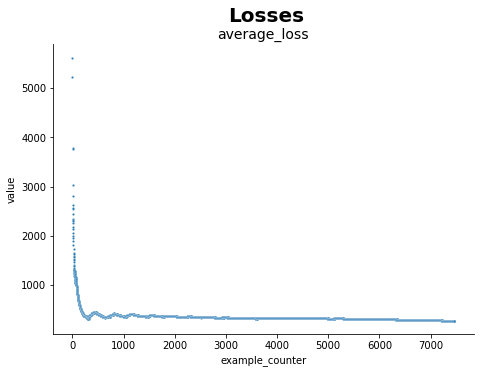

In [ ]:
#scatter_var = ["average_loss", "since_last"]
scatter_var = ["average_loss"]
g = sns.relplot(data=df_iter[scatter_var + ["example_counter"]].melt(id_vars="example_counter"), x="example_counter", y="value", col="variable",col_wrap=3, facet_kws={'sharey': False, 'sharex': True}, kind="scatter", s=5, height=5, aspect=1.25)
g.fig.suptitle('Losses', x= 0.2, y=1, fontsize=20, fontweight='bold', va='center', ha='center')
g.set_titles("{col_name}", size=14)
g.fig.tight_layout()

On the first 1000 examples, the loss function returned a high value. Therefore, regarding the model metrics, we will use only the data from iterations above 1000.

In [ ]:
start_idx = 1000

# Metrics distribution

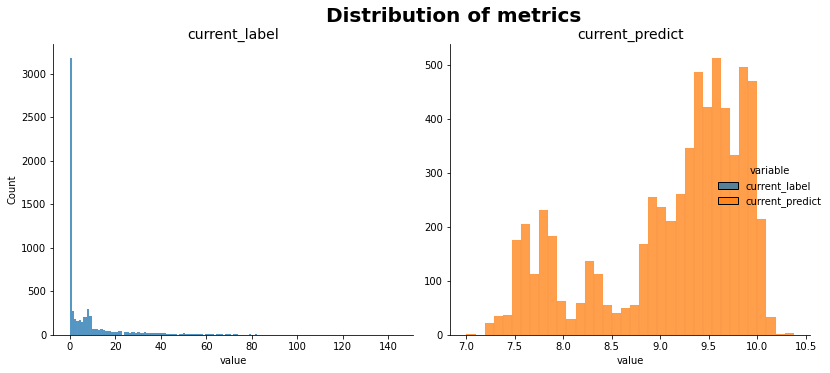

In [ ]:
distr_vars = ["current_label", "current_predict"]

g = sns.displot(data=df_iter.loc[start_idx:, distr_vars].melt(), x="value", col="variable", multiple="dodge", hue="variable", common_bins=False, facet_kws=dict(sharex=False, sharey=False), col_wrap=2, height=5)
g.fig.suptitle('Distribution of metrics', x= 0.55, y=1, fontsize=20, fontweight='bold', va='center', ha='center')
g.set_titles("{col_name}", size=14)
g.fig.tight_layout()

The distributions of predictions differs considerably from the labels distributions. Further discussions on the reasons for this are found in the Conclusion.

# Visualizing predictions

We will define "error" as a subtraction between the real label and its prediction and plot its histogram.

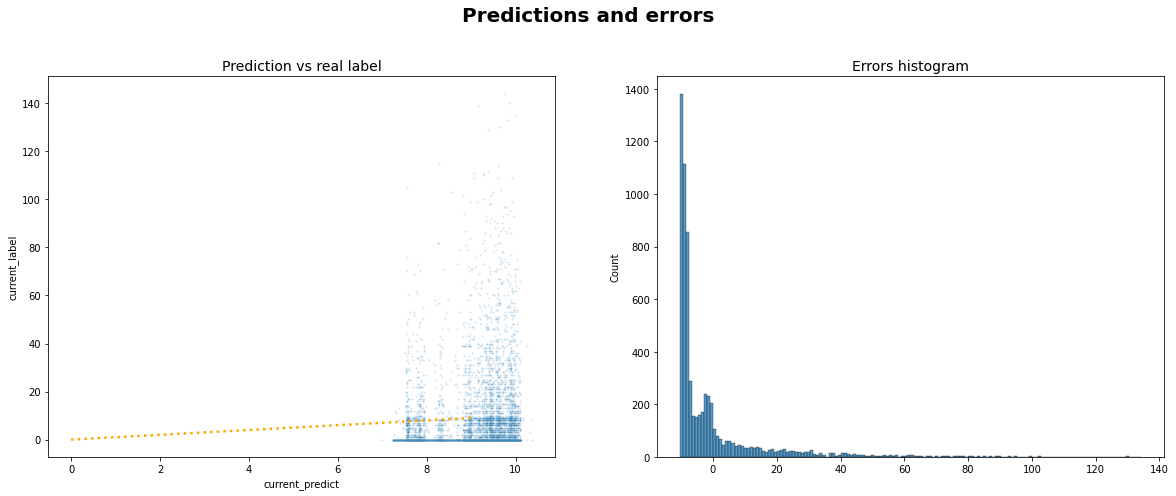

In [ ]:
error = df_iter.current_label - df_iter.current_predict

f, (ax1, ax2) = plt.subplots(figsize=(20, 7), ncols=2)
f.suptitle('Predictions and errors', x= 0.5, y=1, fontsize=20, fontweight='bold', va='center', ha='center')

# Scatterplot pred vs truth
sns.scatterplot(data=df_iter.loc[start_idx:], x="current_predict", y="current_label", ax=ax1, s=4, alpha=.2)
ax1.set_title("Prediction vs real label", fontsize=14)

# Adding x=y line
range_x = range(0, int(df_iter[["current_predict", "current_label"]].max().min()))
ax1.plot(range_x, range_x, linestyle=":", color="orange", linewidth=2.5)

# Histogram of errors
sns.histplot(error[start_idx:], ax=ax2)
ax2.set_title("Errors histogram", fontsize=14)

plt.show()

# Conclusions

This model usually underestimates the rain gauge values on its predictions. The errors histogram is absolutely unbalanced, with virtually all errors ocurring on the first half of the iteractions.
Even if the model has learned to predict the rain gauge daily measure, it does so by predicting an average value, which is not satisfactory for a random phenomenon such as rain. Looking prediction vs. labels distribution graph is another evidence of unsatisfactory prediction.

However, rain prediction is a complex task and the model has, with just a few lines of code, adapted itself somehow to the historic data.

Using more features, such as pressure and humidity indicators, will make this model better and allow multiple weight analysis, an important approach in reinforcement learning.